# Lab | Matplotlib & Seaborn (Challenge 3)

#### Import all the libraries that are necessary.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Challenge 3

#### Open the titanic file. Name your dataset titanic.

Download the dataset from [here](https://drive.google.com/file/d/1jkkOcWm9aEF8gb0r2SsarF5Qdoaaw1do/view?usp=sharing) and place it in the data folder

In [2]:
# Read the data
titanic = pd.read_csv('.\\data\\titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [3]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
Hint: Use Pandas select_dtypes

In [4]:
# Numerical variables
titanic_num = titanic.select_dtypes(include=['float64', 'int64'])
titanic_num.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [5]:
# Categorical variables
titanic_cat = titanic.select_dtypes(include=['object'])
titanic_cat.columns
#paolo-yes

Index(['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

#### Set the plot style to classic and the figure size to (12,6).
Hint: To set the style you can use matplotlib.pyplot functions or seaborn 

In [6]:
# Plot style change
plt.style.use('classic')

# Figure size change
plt.figure(figsize=(12,6))

<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

#### Use the right visulalization to show the distribution of the column Age.

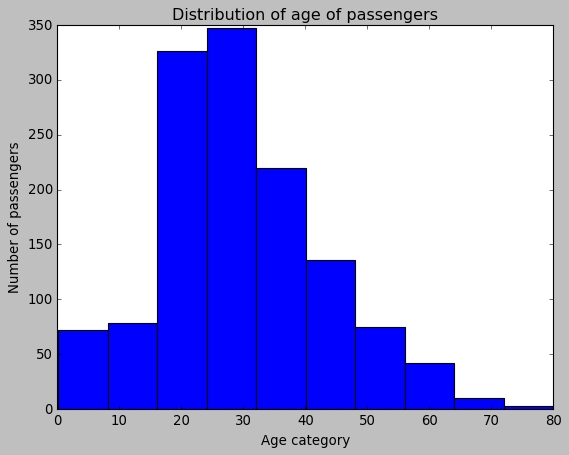

In [7]:
# Pandas plots are based on matplotlib
"""What's this?"""
#paolo: you can also plot with pandas, from a dataframe,
# check cell below

# Plot the histogram of column Age
plt.hist(titanic['Age'])

# Set titles, labels, etc
plt.title('Distribution of age of passengers')
plt.ylabel('Number of passengers')
plt.xlabel('Age category')

# Show the plot
plt.show()

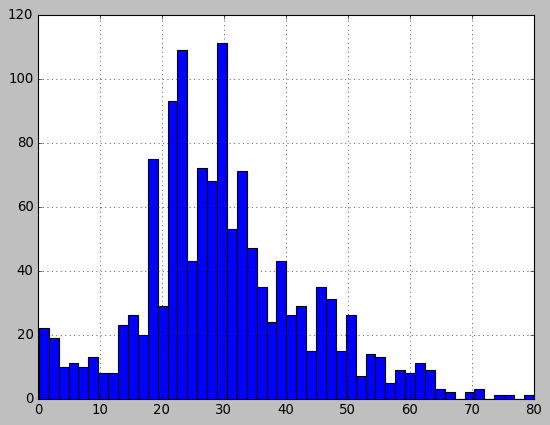

In [27]:
#paolo: plot from a dataframe
titanic['Age'].hist(bins=50);

#### Use subplots and plot the distribution of the Age variable with bins equal to 10, 20 and 50.

(array([1195.,  114.]), array([  0,  50, 100]), <a list of 2 Patch objects>)

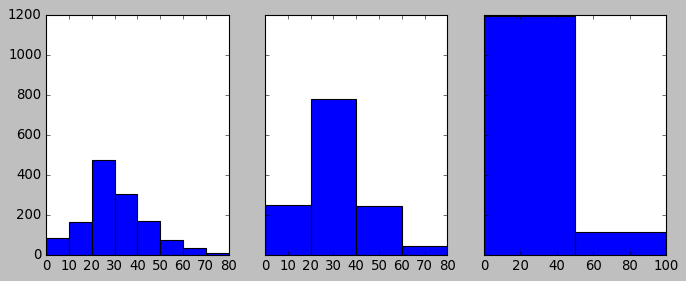

In [28]:
# Variables
age = titanic['Age'].astype(int)

# Create a figure of a fixed size and axes
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, sharey=True, figsize=(10,3.75))

# Plot the histogram using a different number of bins
axs[0].hist(age, bins=range(min(age), max(age) + 10, 10))
axs[1].hist(age, bins=range(min(age), max(age) + 20, 20))
axs[2].hist(age, bins=range(min(age), max(age) + 50, 50))
#
#paolo: good idea but something does not work. If you count the number of bins on plots are not as requested. One of the 
# plots as only two bins for example. Denpends on how you defined the bins, check below

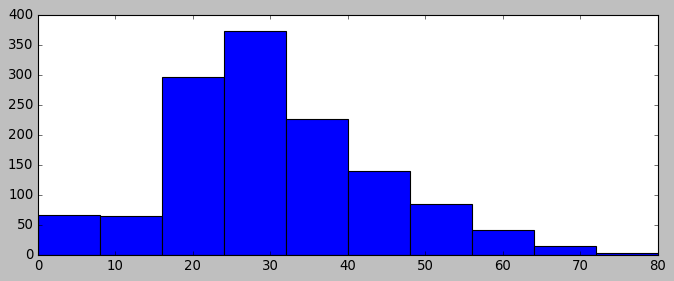

In [33]:
#paolo: to set number of bins to njust do bins=n, 10 in the example here you can count them on the plot
fig, axs = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=True, figsize=(10,3.75))
axs.hist(age, bins=10);

#### How does the bin size affect your plot? Comment.

In [9]:
"""Comment was already there:
Using a low number of bins (wider bins) reduces noise on the 
distribution estimation while using a high number of bins 
(narrower bins) gives greater precision to the distribution estimation 
(and more noise). 
"""
#paolo: ok

'Comment was already there:\nUsing a low number of bins (wider bins) reduces noise on the \ndistribution estimation while using a high number of bins \n(narrower bins) gives greater precision to the distribution estimation \n(and more noise). \n'

#### Use seaborn to show the distribution of the column Age.

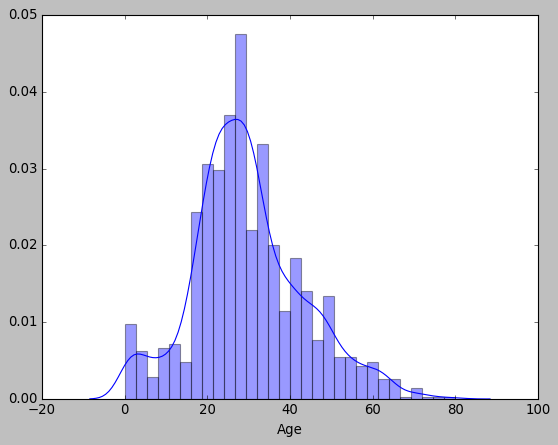

In [10]:
# Seaborn is a Python library based on matplotlib

# Plot of the age histogram using seaborn
sns.distplot(age)

# Show the plot
plt.show()

#### Use the right plot to visualize the column Gender. There are 2 ways of doing it. Do it both ways.
Hint: Use matplotlib and seaborn

In [11]:
# OPTION 1 - Matplotlib
titanic['Gender'].value_counts()

male      843
female    466
Name: Gender, dtype: int64

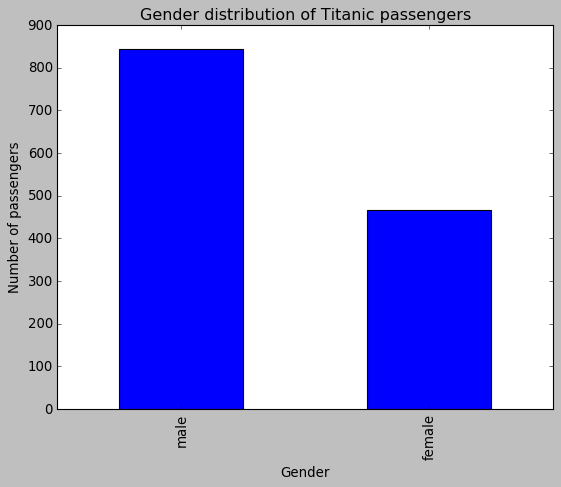

In [12]:
# Bar plot of the gender
titanic['Gender'].value_counts().plot(kind='bar');

# Add labels to the plot and change xticks rotation
plt.ylabel('Number of passengers')
plt.xlabel('Gender')
plt.title('Gender distribution of Titanic passengers')

# Show the plot
plt.show()

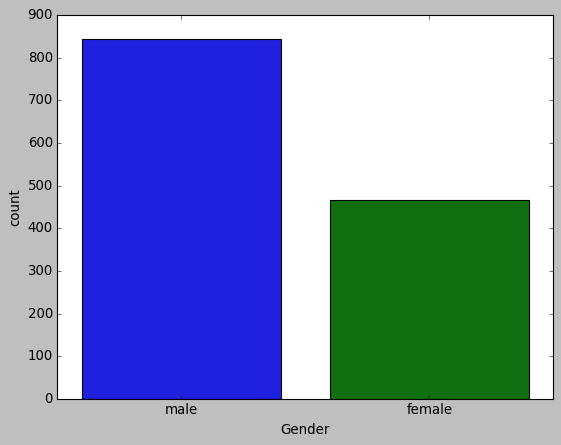

In [13]:
# OPTION 2 - Seaborn

# Seaborn Countplot
sns.countplot(x='Gender', data=titanic)

# Show the plot
plt.show()
#paolo:yes

#### Use the right plot to visualize the column Pclass.

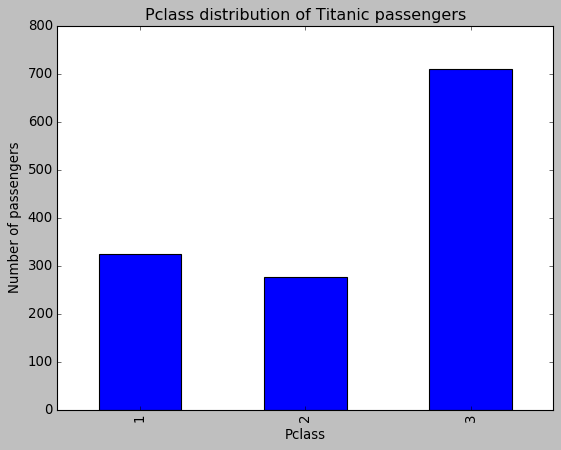

In [14]:
# Bar plot of Pclass
titanic['Pclass'].value_counts().sort_index(axis=0).plot(kind='bar');

# Add labels to the plot and change xticks rotation
plt.xlabel('Pclass')
plt.ylabel('Number of passengers')
plt.title('Pclass distribution of Titanic passengers')

# Show the plot
plt.show()

#### We would like to have in one single plot the summary statistics of the feature Age. What kind of plot would you use?

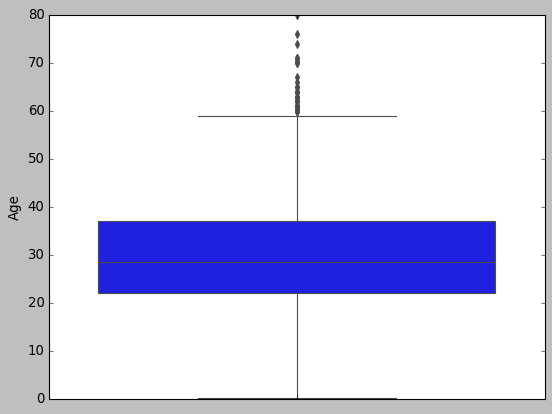

In [15]:
# Box plot
sns.boxplot(y='Age', data=titanic)

# Show the plot
plt.show()

#### What does the last plot tells you about the feature Age? Comment.

In [16]:
""" Comment was already there..: 
The statistics that you can get from the boxplot are the minimum, 
first quartile, median, third quartile, and maximum.

The grey line in the blue box shows us the median of Age. 
The blue box shows us the interquartile range (from Q1 to Q3).
It also shows us the outliers, which are out of the maximum and 
minimum range (Q1 - 1.5*IQR, Q3 + 1.5*IQR).
"""

' Comment was already there..: \nThe statistics that you can get from the boxplot are the minimum, \nfirst quartile, median, third quartile, and maximum.\n\nThe grey line in the blue box shows us the median of Age. \nThe blue box shows us the interquartile range (from Q1 to Q3).\nIt also shows us the outliers, which are out of the maximum and \nminimum range (Q1 - 1.5*IQR, Q3 + 1.5*IQR).\n'

#### Now in addition to the summary statistics, we want to have in the SAME plot the distribution of Age. What kind of plot would you use?

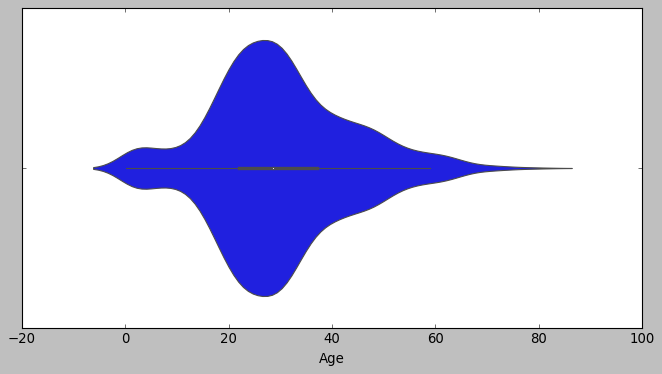

In [17]:
# Set figure size
plt.figure(figsize=(10,5))

# Violin plot
sns.violinplot(titanic["Age"])

# Show the plot
plt.show()

#### What additional information the last plot provides you about the feature Age? Comment.

In [18]:
""" Comment was already there: 
This plot is a combination of a boxplot and a density plot. 
The violin plot features a kernel density estimation 
of the underlying distribution of the data.

The black central part of the plot is the same as a boxplot and 
the white dot is the median. The blue part is the distribution of the data.
"""

' Comment was already there: \nThis plot is a combination of a boxplot and a density plot. \nThe violin plot features a kernel density estimation \nof the underlying distribution of the data.\n\nThe black central part of the plot is the same as a boxplot and \nthe white dot is the median. The blue part is the distribution of the data.\n'

#### We suspect that there is a linear relationship between Fare and Age. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
Hint: One of the ways involves using Seaborn.

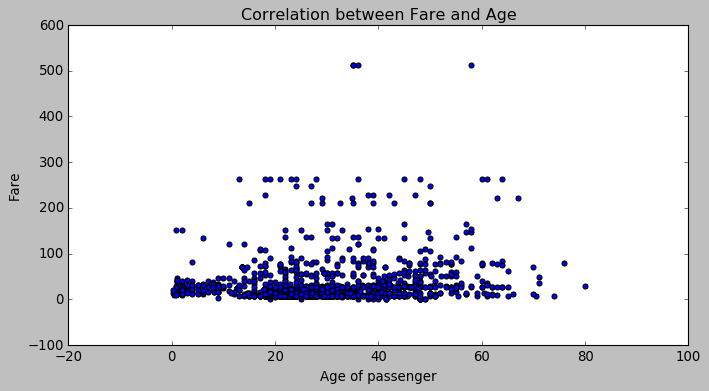

In [19]:
# OPTION 1
plt.figure(figsize=(10,5))

# Scatter plot
plt.scatter(x='Age', y='Fare', data=titanic)

# Add labels
plt.ylabel('Fare')
plt.xlabel('Age of passenger')
plt.title('Correlation between Fare and Age')

# Show the plot
plt.show()

<Figure size 1200x400 with 0 Axes>

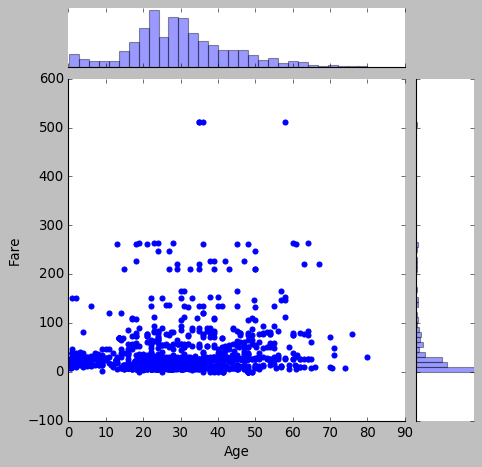

In [20]:
# OPTION 2
plt.figure(figsize=(15,5))

# Joinplot
sns.jointplot(x='Age', y='Fare', data=titanic)

# Show the plot
plt.show()
#paolo: yes, cool plot no?

#### Using Seaborn plot the correlation matrix.

<Figure size 1200x400 with 0 Axes>

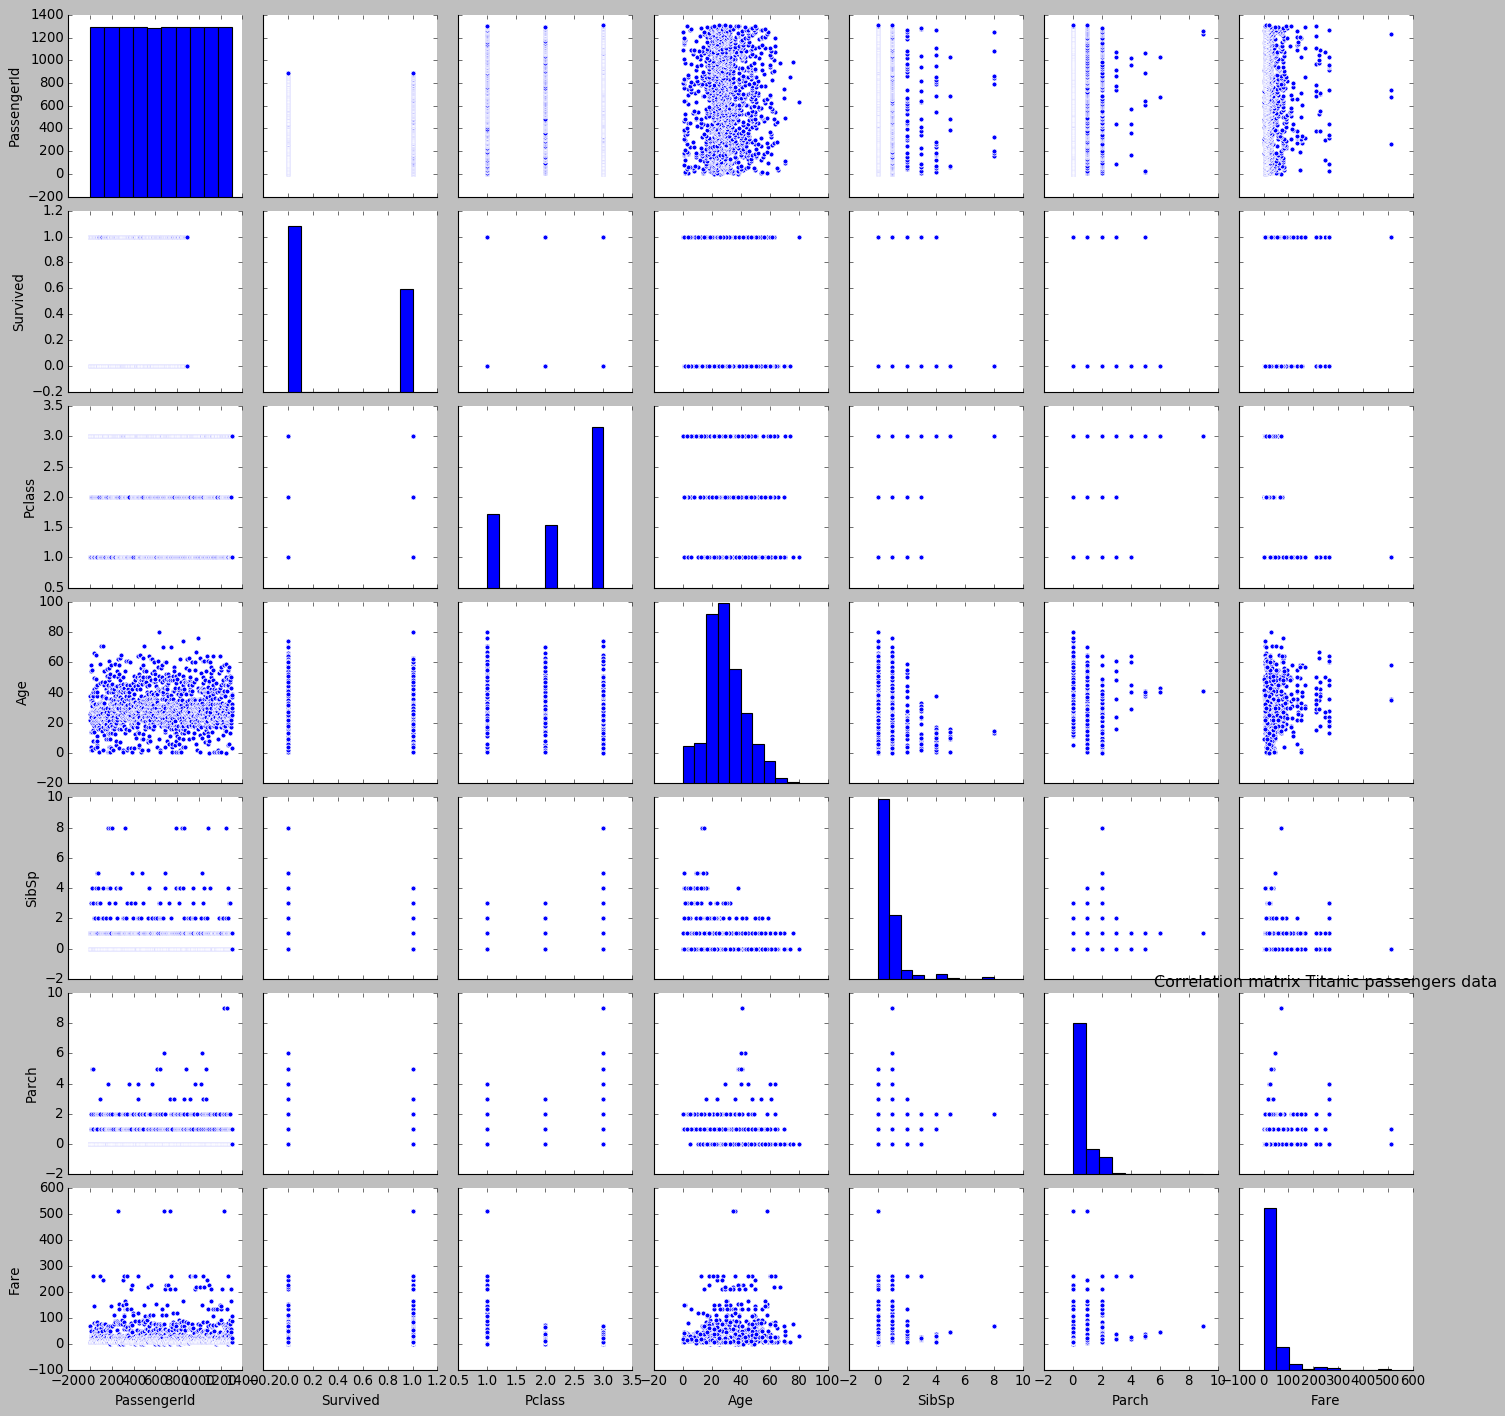

In [21]:
# Set figure size
plt.figure(figsize=(15,5))

# Correlation matrix
sns.pairplot(titanic)
#paolo: be careful, this is not a correlation plot
# check below

# Add title
plt.title('Correlation matrix Titanic passengers data')

# Show plot
plt.show()

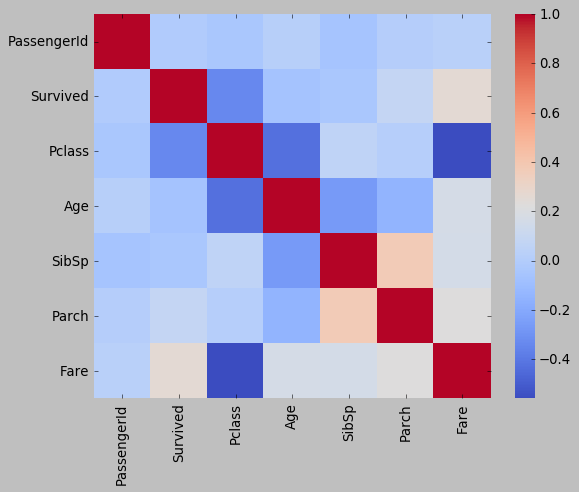

In [35]:
#paolo: correlation plot ( from -1 to 1)
sns.heatmap(titanic.corr(), cmap='coolwarm');

In [22]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.025325,-0.055224,0.008942,0.031128
Survived,-0.005007,1.000000,-0.338481,-0.065376,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.425965,0.060832,0.018322,-0.558683
Age,0.025325,-0.065376,-0.425965,1.000000,-0.260706,-0.145488,0.171355
SibSp,-0.055224,-0.035322,0.060832,-0.260706,1.000000,0.373587,0.160349
Parch,0.008942,0.081629,0.018322,-0.145488,0.373587,1.000000,0.221635
Fare,0.031128,0.257307,-0.558683,0.171355,0.160349,0.221635,1.000000


#### What are the most correlated features? Comment.

In [23]:
"""
Parch and SibSp.
"""

'\nParch and SibSp.\n'

#### Use the right plot to display the summary statistics of the Age in function of the Pclass.

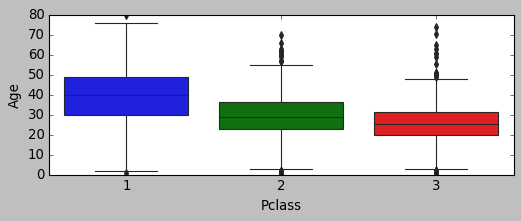

In [24]:
# Set fig size
plt.figure(figsize=(7.5,2.5))

# Box plot
sns.boxplot(x='Pclass', y='Age', data=titanic)

# Show the plot
plt.show()

#### Use the seaborn to plot the distribution of the Age based on the Gender.
Hint: Use Facetgrid

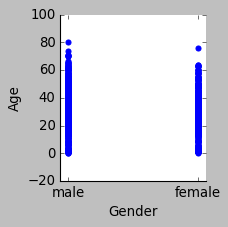

In [40]:
# Create a grid with FacetGrid
plot_titanic = sns.FacetGrid(titanic)

# Draw a plot on each facet
plot_titanic = (plot_titanic.map(plt.scatter, 'Gender', 'Age'))

# Show the plot
plt.show()
#paolo: ok, but not a very insightful plot, check below

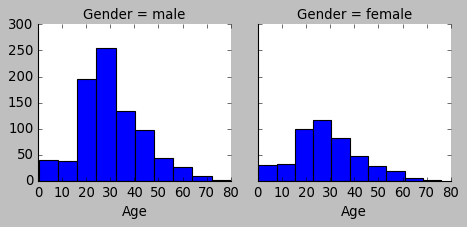

In [42]:
g = sns.FacetGrid(titanic, col="Gender")
g.map(plt.hist, 'Age')
plt.show()

In [ ]:
#paolo: good work!